Time to record data to scope:  0.2758972644805908
Time to copy to RAM:  0.03635382652282715


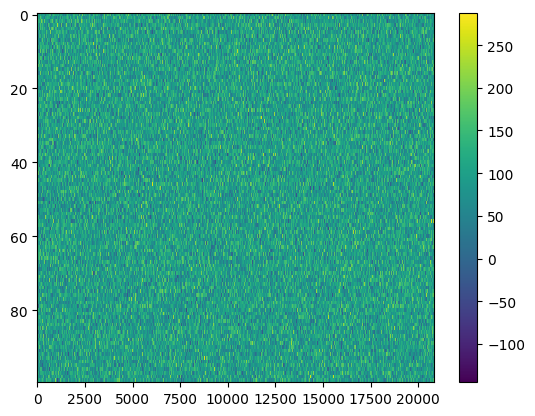

In [2]:
from picoscope import ps5000a
import matplotlib.pyplot as plt
import numpy as np
import time

ps = ps5000a.PS5000a()

# rapid block mode

ps.setChannel(channel="A", coupling="DC", VRange=1)
ps.setChannel(channel="B", enabled=False)

n_captures = 100
sample_interval = 100e-9  # 100 ns
sample_duration = 2e-3  # 1 ms
ps.setResolution('16')
ps.setSamplingInterval(sample_interval, sample_duration)
ps.setSimpleTrigger("A", threshold_V=0.1, timeout_ms=1)

samples_per_segment = ps.memorySegments(n_captures)
ps.setNoOfCaptures(n_captures)

data = np.zeros((n_captures, samples_per_segment), dtype=np.int16)

t1 = time.time()

ps.runBlock()
ps.waitReady()

t2 = time.time()
print("Time to record data to scope: ", str(t2 - t1))

ps.getDataRawBulk(data=data)

t3 = time.time()
print("Time to copy to RAM: ", str(t3 - t2))

plt.imshow(data[:, 0:ps.noSamples], aspect='auto', interpolation='none')
plt.colorbar()
plt.show()

ps.close()